<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Линейная алгебра
# Проект: Защита персональных данных клиентов
# Описание проекта

Необходимо защитить данные клиентов страховой компании «Хоть потоп». Разработать такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обосновать корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

Импортируем необходимые библиотеки и инструменты.

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error 

Прочитаем датасет формата `csv` методом `read`. 

In [2]:
try:
    df = pd.read_csv('D:/notebook/project_10/insurance.csv')
except:
    df = pd.read_csv('/datasets/insurance.csv')

Посмотрим на датафрейм.

In [3]:
df

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
...,...,...,...,...,...
4995,0,28.0,35700.0,2,0
4996,0,34.0,52400.0,1,0
4997,0,20.0,33900.0,2,0
4998,1,22.0,32700.0,3,0


Посмотрим на информацию о датафрейме.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


Датафрейм содержит 5000 строк и 5 столбцов. Присутствуют 2 типа данных целочисленный (int64) и с плавующей точкой (float64).

Проверим датафрейм на наличие грубых дубликатов.

In [5]:
df.duplicated().sum()

153

Удалим дубликаты и переназначим индексы. 

In [6]:
df = df.drop_duplicates().reset_index(drop = True)
df.duplicated().sum()

0

Проверим изменения.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4847 entries, 0 to 4846
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                4847 non-null   int64  
 1   Возраст            4847 non-null   float64
 2   Зарплата           4847 non-null   float64
 3   Члены семьи        4847 non-null   int64  
 4   Страховые выплаты  4847 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 189.5 KB


Так как мы готовим данные к линейной регрессии, то посмотрим корреляцию столбцов.

<AxesSubplot:>

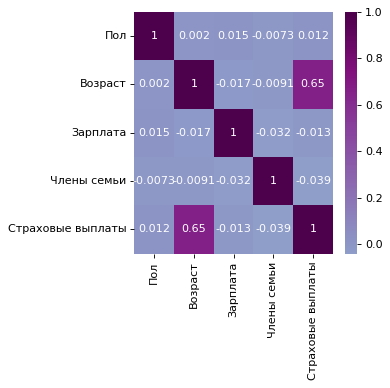

In [8]:
plt.figure(figsize=(4,4), dpi= 80)
sns.heatmap(df.corr(),  cmap= 'BuPu', center=0, annot=True)

Замечена средняя корреляция между возрастом и количеством страховых выплат.

Посмотрим на уникальные значения во всех столбцах.

In [9]:
columns_list = ['Пол', 'Возраст', 'Зарплата', 'Члены семьи', 'Страховые выплаты']
def check_columns(df):
    for column in columns_list:
        print('Количество значений в столбце', column)
        print(df[column].value_counts())
check_columns(df)

Количество значений в столбце Пол
0    2431
1    2416
Name: Пол, dtype: int64
Количество значений в столбце Возраст
19.0    213
25.0    205
31.0    202
26.0    201
22.0    201
27.0    201
29.0    196
28.0    196
30.0    196
32.0    196
23.0    195
21.0    193
20.0    190
36.0    186
33.0    186
24.0    176
34.0    173
35.0    173
37.0    143
39.0    140
38.0    135
41.0    124
18.0    116
40.0    110
42.0     93
43.0     77
44.0     74
45.0     73
46.0     60
47.0     47
49.0     37
50.0     26
48.0     26
52.0     22
51.0     21
53.0     11
55.0      9
54.0      7
56.0      5
59.0      3
57.0      2
58.0      2
60.0      2
61.0      1
65.0      1
62.0      1
Name: Возраст, dtype: int64
Количество значений в столбце Зарплата
45800.0    28
37100.0    27
38800.0    26
32800.0    26
40500.0    25
           ..
17700.0     1
70600.0     1
18100.0     1
13000.0     1
56800.0     1
Name: Зарплата, Length: 524, dtype: int64
Количество значений в столбце Члены семьи
1    1748
0    1461
2    10

In [10]:
df[(df['Страховые выплаты']) > 2]

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
177,1,56.0,56000.0,0,3
228,1,65.0,39700.0,1,5
235,0,55.0,35900.0,1,3
256,0,57.0,28100.0,2,3
638,0,55.0,41600.0,0,3
1054,1,55.0,52400.0,0,3
1116,1,58.0,28300.0,1,3
1204,1,58.0,26500.0,0,3
1436,0,55.0,42300.0,1,3
1439,1,55.0,33100.0,1,3


У людей от 55 лет и старше самое большое количество страховых выплат, пенсионеры самые невыгодные клиенты для страховых компаний.

## Умножение матриц

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Утверждение:** При умножении на обратимую матрицу, качество линейной регрессии не изменится.

**Обоснование:** 

Формула расчета весов для линейной регрессии:
$$
w = (X^T X)^{-1} X^T y
$$



Представим новую матрицу признаков $X1$ как произведение старой $X$ на матрицу $P$ (обратимую):

$$
X1 = X * P
$$
Подставим новое значение X1 в формулу $w1$:

$$
w1 = (X1^T X1)^{-1} X1^T y
$$

$$
w1 = ((X P)^T X P)^{-1} (X P)^T y
$$
Раскроем произведение $ (XP)^T $:

$$
w1 = (P^T X^T X P)^{-1} P^T X^T y
$$

Перегруппируем множители в скобках, чтобы это выглядело как произведение трех множителей:

$$
w1 = (P^T (X^T X) P)^{-1} P^T X^T y
$$

Раскроем скобки $ (P^T (X^T X) P)^{-1} $:

$$
w1 = P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y
$$

Так как $P$ по условию обратимая, то произведение $(P^T)^{-1} P^T$ равно $E$ (единичная матрица):

$$
w1 = P^{-1} (X^T X)^{-1} E X^T y = P^{-1} (X^T X)^{-1} X^T y
$$

Можно заметить, что справа получилась формула для $w$:

$$
w1 = P^{-1} (X^T X)^{-1} X^T y = P^{-1} w
$$

Подставим новое значение весов 𝑤1 в формулу для предсказаний линейной регрессии. Предсказания модели рассчитываются по формуле:

$$
a = Xw
$$

Подставим в эту формулу значения $X1$ и $w1$ для того, чтобы на их основе вычислить предсказания модели $a1$:

$$
a1 = X1w1 = XPP^{-1} w
$$

Так как $P$ по условию обратимая, то произведение $PP^{-1}$ снова равно $E$:

$$
a1 = XPP^{-1} w = X E w = X w = a
$$

Мы доказали, что предсказания $a1$ для матрицы признаков, умноженных на обратимую матрицу $P$ равны предсказаниям $a$. Следовательно, при умножении признаков на обратимую матрицу - качество линейной регрессии не изменится. В данном случае, параметры линейной регрессии в исходной задаче $w$ и в преобразованной $w1$ связаны следующим образом:

$$
w1 = P^{-1} w
$$

## Алгоритм преобразования

**Алгоритм**

    1. Создание случайной матрицы.
    2. Проверка матрицы на обратимость.
    3. Умножение на признаки.
    4. Поиск метрик (R2) обученной модели на исходных признаках и на трансформированных признаках (умноженных на матрицу).
    5. Сравнение метрик между собой. 

**Обоснование**

На основании доказательства из предыдущего пункта можно заключить, что перемножение матриц не повлияет на качество линейной регрессии.

## Проверка алгоритма

Выделим признаки и целевой признак.

In [11]:
features = df.drop('Страховые выплаты', axis=1)
target = df['Страховые выплаты']

Сгенерируем случайную матрицу размером 4х4.

In [12]:
matrix = np.random.normal(size = (4,4))

In [13]:
matrix

array([[-8.64079670e-01, -3.08880233e-03,  1.20189551e+00,
         1.28099871e-01],
       [ 8.77572230e-01,  3.11073586e-01, -8.65866134e-01,
        -4.81301923e-01],
       [ 6.20729248e-01,  3.25736804e+00,  6.51096906e-01,
        -9.21317263e-01],
       [ 5.98744113e-01,  4.01140830e-01,  5.05542405e-01,
        -3.53715696e-01]])

Найдем обратную матрицу, заодно проверим матрицу `matrix` на обратимость.

In [14]:
matrix_inv = np.linalg.inv(matrix)

In [15]:
matrix_inv

array([[-1.61495156, -1.41946275, -0.04682837,  1.46857731],
       [-0.67425644, -0.77785801,  0.41276862, -0.26088315],
       [ 0.03653935, -0.58349898, -0.06426035,  0.97457943],
       [-3.44610756, -4.11887024,  0.29700069,  0.75581142]])

Посмотрим на признаки до перобразования.

In [16]:
features

,Пол,Возраст,Зарплата,Члены семьи
0,1,41.0,49600.0,1
1,0,46.0,38000.0,1
2,0,29.0,21000.0,0
3,0,21.0,41700.0,2
4,1,28.0,26100.0,0
...,...,...,...,...
4842,0,28.0,35700.0,2
4843,0,34.0,52400.0,1
4844,0,20.0,33900.0,2
4845,1,22.0,32700.0,3


Обучим модель линейной регрессии на исходных данных и рассчитаем метрику `R2`.

In [17]:
model = LinearRegression()
model.fit(features, target)
original_predictions = model.predict(features)
original_r2_score = r2_score(target, original_predictions)
print('R2 на исходных признаках:', original_r2_score)

R2 на исходных признаках: 0.4302010044852068


Найдём MSE на исходных данных.

In [18]:
original_mse = mean_squared_error(target, original_predictions)
print('MSE на исходных данных:', original_mse)

MSE на исходных данных: 0.125272638266816


Умножим признаки на полученную обратную матрицу и сохраним в переменной `transform_features`.

In [19]:
transform_features = features @ matrix_inv

Посмотрим на признаки после перобразования.

In [20]:
transform_features

,0,1,2,3
0,1779.646168,-28978.980102,-3170.139757,48330.667678
1,1354.033382,-22212.861719,-2422.609006,37022.773351
2,747.772905,-12276.036540,-1337.497095,20458.602321
3,1502.639279,-24356.480379,-2670.394522,40635.995115
4,933.182893,-15252.522961,-1665.684486,25430.686851
...,...,...,...,...
4842,1278.683386,-20860.931482,-2281.943032,34786.692380
4843,1888.291094,-30605.912788,-3352.911294,51059.847674
4844,1218.306608,-19804.410448,-2169.576548,33034.536480
4845,1168.049817,-19111.305716,-2091.388416,31866.743792


Обучим модель линейной регрессии на преобразованных данных и рассчитаем метрику `R2`.

In [21]:
model.fit(transform_features, target)
transform_predictions = model.predict(transform_features)
transform_r2_score = r2_score(target, transform_predictions)
print('R2 на преобразованных признаках:', transform_r2_score)

R2 на преобразованных признаках: 0.43020100448520526


Найдём MSE на преобразованных данных.

In [22]:
transform_mse = mean_squared_error(target, transform_predictions)
print('MSE на на преобразованных данных:', transform_mse)

MSE на на преобразованных данных: 0.12527263826681634


In [23]:
original_r2_score - transform_r2_score

1.5543122344752192e-15

Разница очень мала.

## Вывод
Качество линейной регрессии не изменилось, можно сделать вывод, что алгоритм преобразования данных работает правильно.

## Чек-лист проверки

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные загружены
- [x]  Выполнен шаг 2: получен ответ на вопрос об умножении матриц
    - [x]  Указан правильный вариант ответа
    - [x]  Вариант обоснован
- [x]  Выполнен шаг 3: предложен алгоритм преобразования
    - [x]  Алгоритм описан
    - [x]  Алгоритм обоснован
- [x]  Выполнен шаг 4: алгоритм проверен
    - [x]  Алгоритм реализован
    - [x]  Проведено сравнение качества моделей до и после преобразования